In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [20]:
pd.set_option('display.max_columns', None)

In [25]:
pd.set_option('display.max_rows', None)

In [2]:
dataset_path = Path(r"/home/rwth1591/transfer-learning/theta/data/theta_posix_withapps_no_negative_outliers_no_mira_no_time_witherrors.csv")

In [3]:
df = pd.read_csv(Path(r"/home/rwth1591/transfer-learning/blue_waters/models-test/captum_ig_result_theta.csv"))
df_dl = pd.read_csv(Path(r"/home/rwth1591/transfer-learning/blue_waters/models-test/captum_dl_result_theta.csv"))

In [4]:
df_data = pd.read_csv(dataset_path)
df_data = df_data

In [5]:
df_data[df_data["app"].str.contains("rxmd")]["rank"].unique()

array([-1])

In [14]:
df.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,46.672332,-21.693000,0.000394,-0.003873,0.003307,0.001059,0.332052,0.0,-0.0,0.000424,-0.000022,-0.006044,-0.002522,-0.000998,-0.000986,-0.001151,-0.015643,0.006430,-0.006695,0.003502,0.000029,0.848768,-0.004032,0.002122,8.896733e-12,0.001245,0.000801,-0.003137,-0.003532,-0.047203,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.005284,0.010421,0.000014,-0.0,-0.000005,0.000000,-0.0,-0.0,0.0,-0.0,0.000686,0.000330,0.000159,0.000015,-0.000043,-0.000045,-0.000043,-0.000038,0.007722,-0.000108,-0.000297,0.000132,0.030481,0.053673,0.067817,0.000019,0.006987,-0.017700,0.001494,-0.000413,-0.003179,-0.003679,-0.047189,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.005287,0.010651,-0.000020,-0.0,0.000001,0.00000,-0.0,-0.0,0.0,-0.0,-0.061774,0.007126
1,1,-0.074768,0.182695,0.027178,-0.049468,-0.002379,-0.002369,-0.026676,-0.0,-0.0,0.027652,0.022844,0.001077,-0.042257,-0.070585,-0.006732,0.006625,-0.225003,-0.002109,-0.094473,-0.002095,-0.000929,-0.003909,-0.183702,-0.012789,6.035642e-03,0.011499,-0.001616,-0.014758,-0.028064,-0.678514,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.000108,-0.002871,-0.001111,0.0,-0.001996,0.000000,0.0,0.0,-0.0,-0.0,0.021787,0.007253,0.001061,0.000221,-0.000550,-0.000491,-0.000734,-0.000078,0.004027,-0.004412,-0.004663,0.000659,-0.196719,-0.045201,-0.031232,-0.006285,-0.019401,-0.213573,-0.115728,-0.002917,-0.014863,-0.029722,-0.674900,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.000108,-0.002815,-0.000891,0.0,-0.002051,0.00000,0.0,0.0,-0.0,-0.0,0.387330,-0.015258
2,2,4.922729,31.957372,0.024454,3.559268,0.627477,-1.033628,0.334082,-0.0,0.0,0.039541,0.026382,-10.116014,2.895631,0.158782,-0.006346,-0.023159,4.021406,1.350521,8.363227,0.637960,-1.017998,73.841021,-17.748983,2.309439,-1.572070e+00,0.045421,0.240831,3.758816,2.328538,21.655502,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.489060,18.481425,-0.289868,-0.0,-0.000635,-35.839501,-0.0,-0.0,-0.0,-0.0,-0.013589,0.007491,0.005618,-0.002642,-0.001523,-0.001712,-0.001256,0.000198,-0.671106,0.670624,0.811086,-1.095884,4.743843,2.781348,7.814135,-2.653442,0.449393,0.200371,0.032885,-0.021315,3.612452,2.178664,21.616258,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.489580,19.073037,-0.209264,-0.0,-0.000739,23.66941,-0.0,-0.0,-0.0,-0.0,-0.000000,1.025825
3,3,-0.065132,0.212206,0.031724,-0.058284,-0.002832,-0.002579,-0.031594,-0.0,-0.0,0.030149,0.027503,-0.013022,-0.057200,-0.105017,-0.012311,-0.000366,-0.242880,-0.002169,-

In [13]:
df_dl.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,37.189590,-13.398854,0.000398,-0.003233,0.002614,0.000783,0.302755,0.0,-0.0,0.000421,0.000023,-0.005158,-0.002071,-0.000714,-0.000804,-0.001027,-0.012684,0.004839,-0.005585,0.002771,0.000022,0.718903,-0.003602,0.001862,9.648051e-12,0.001076,0.000754,-0.002832,-0.003079,-0.039703,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.004027,0.009010,0.000017,-0.0,6.142511e-08,0.000000,-0.0,-0.0,0.0,-0.0,0.000902,0.000333,0.000219,0.000029,-0.000041,-0.000040,-0.000036,-0.000036,0.007324,-0.000028,-0.000150,0.000123,0.031757,0.077536,0.097251,0.000017,0.005911,-0.014757,0.002316,-0.000370,-0.002870,-0.003188,-0.039686,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.004019,0.009227,-0.000018,-0.0,0.000006,0.000000,-0.0,-0.0,0.0,-0.0,-0.060034,0.005916
1,1,-0.075363,0.186555,0.027950,-0.050616,-0.002494,-0.002335,-0.028144,-0.0,-0.0,0.028297,0.023464,0.000743,-0.043964,-0.074870,-0.007299,0.006142,-0.229458,-0.002210,-0.097176,-0.002195,-0.000940,-0.004005,-0.189103,-0.013262,6.280849e-03,0.013150,-0.002149,-0.015091,-0.030533,-0.696497,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.000112,-0.003048,-0.001317,0.0,-2.100389e-03,0.000000,0.0,0.0,-0.0,-0.0,0.022407,0.007534,0.000947,0.000189,-0.000574,-0.000515,-0.000774,-0.000080,0.008005,-0.004880,-0.005131,0.000782,-0.200715,-0.045639,-0.031879,-0.006507,-0.019856,-0.224493,-0.117998,-0.003005,-0.015294,-0.031932,-0.693091,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.000112,-0.003010,-0.001075,0.0,-0.002159,0.000000,0.0,0.0,-0.0,-0.0,0.409707,-0.014843
2,2,3.924676,34.025150,0.025902,3.656039,0.650629,-0.988840,0.326368,-0.0,0.0,0.040582,0.028412,-8.543003,2.839674,0.147768,-0.006844,-0.021492,5.273491,1.354647,8.354443,0.662529,-0.966348,70.094490,-17.618673,2.312373,-1.632526e+00,0.043033,0.237783,3.539382,2.341489,24.987726,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.493878,19.269825,-0.251465,-0.0,-5.583784e-04,-39.884453,-0.0,-0.0,-0.0,-0.0,-0.011401,0.008177,0.005498,-0.002306,-0.001458,-0.001632,-0.001194,0.000171,-0.642764,0.648519,0.785429,-1.052539,4.725210,3.206705,7.886387,-2.357765,0.395425,0.172819,0.029184,-0.019991,3.421479,2.210180,24.963415,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.496813,19.865211,-0.173977,-0.0,-0.000627,19.370098,-0.0,-0.0,-0.0,-0.0,-0.000000,0.909648
3,3,-0.064115,0.137414,0.020195,-0.035931,-0.002101,-0.001631,-0.027005,-0.0,-0.0,0.018489,0.015920,-0.001918,-0.035518,-0.065853,-0.006904,-0.001806,-0.165057

In [9]:
df_diff = df_dl - df
df_diff.describe().transpose()#.abs().sort_values(ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,218111.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
POSIX_OPENS,218111.0,-4.971445,162.047694,-47291.969568,-0.239824,-1.280139e-03,0.002372,1140.898100
POSIX_FILENOS,218111.0,2.809872,41.214155,-2462.047111,-0.269276,4.774346e-05,0.005435,8104.230051
POSIX_DUPS,218111.0,-0.005271,0.057637,-3.479459,-0.002966,-1.208144e-07,0.000176,3.162426
POSIX_READS,218111.0,0.209751,2.526448,-31.452507,-0.000694,1.058231e-03,0.008283,354.322936
...,...,...,...,...,...,...,...,...
WRITE_10M_100M,218111.0,0.020050,2.333372,-378.992752,0.000000,0.000000e+00,0.000000,786.246600
WRITE_100M_1G,218111.0,0.031531,5.168293,-78.002542,0.000000,0.000000e+00,0.000000,1888.487405
WRITE_1G_PLUS,218111.0,0.000018,0.002294,-0.448887,0.000000,0.000000e+00,0.000000,0.264927
rank,218111.0,0.307779,3.255174,-58.858813,0.000000,0.000000e+00,0.000000,807.017956


**Attention: std sensitive to outliers?**

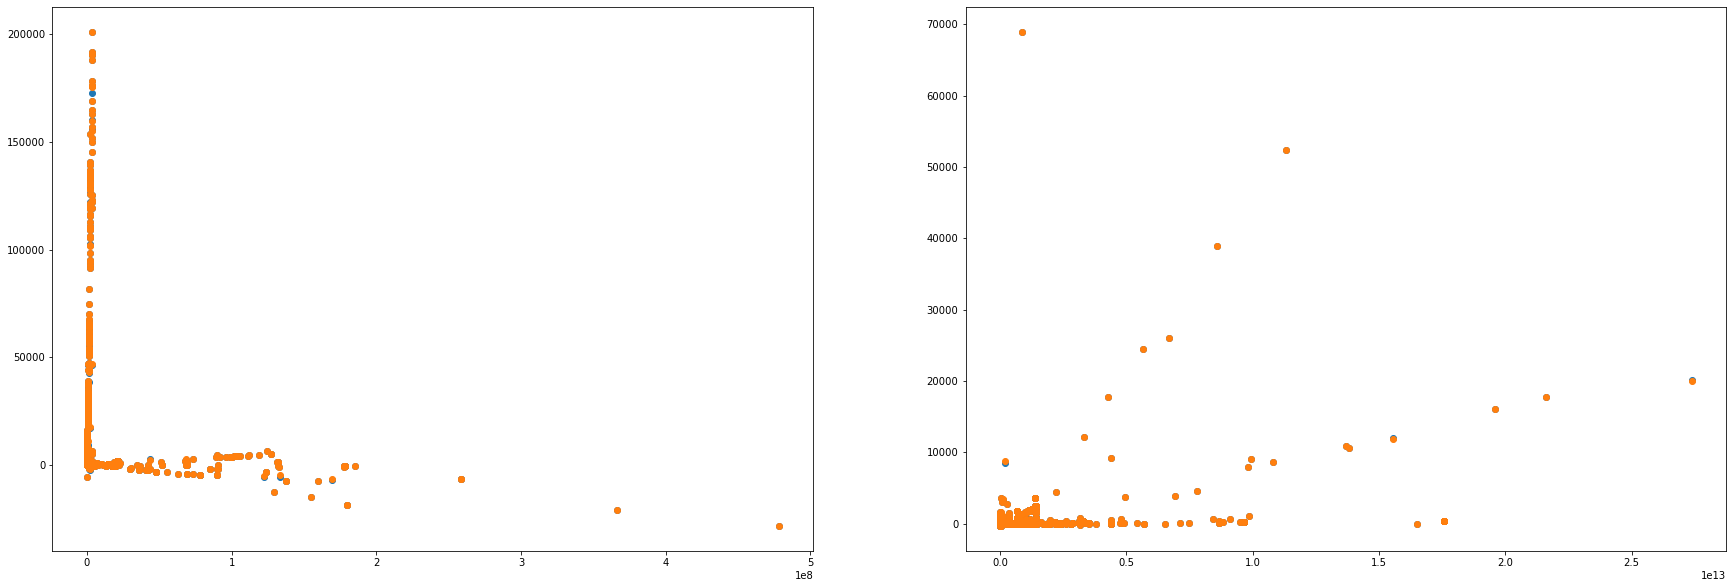

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
axs[0].scatter(x=df_data.POSIX_STATS,y=df.POSIX_STATS)
axs[0].scatter(x=df_data.POSIX_STATS,y=df_dl.POSIX_STATS)
axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN,y=df.POSIX_BYTES_WRITTEN)
axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN,y=df_dl.POSIX_BYTES_WRITTEN)

In [21]:
df_diff["POSIX_OPENS"].sort_values(ascending=False).head()

29918    285.895186
2911     191.150387
65553    161.144860
59632    156.258284
80494    154.296758
Name: POSIX_OPENS, dtype: float64

In [34]:
df_data.iloc[29918]

Unnamed: 0                         29918
index                             437329
POSIX_OPENS                      3425147
POSIX_FILENOS                     -23524
POSIX_DUPS                        -23524
POSIX_READS                       777946
POSIX_WRITES                     5146393
POSIX_SEEKS                      1773706
POSIX_STATS                      6862054
POSIX_MMAPS                            0
POSIX_FSYNCS                           0
POSIX_RENAME_SOURCES              -23524
POSIX_RENAME_TARGETS              -23524
POSIX_MODE                       6623436
POSIX_BYTES_READ             11932947898
POSIX_BYTES_WRITTEN          11913972949
POSIX_MAX_BYTE_READ           3313166584
POSIX_MAX_BYTE_WRITTEN        4541405537
POSIX_CONSEC_READS                742661
POSIX_CONSEC_WRITES              1722928
POSIX_SEQ_READS                   742661
POSIX_SEQ_WRITES                 3414311
POSIX_RW_SWITCHES                  16800
POSIX_MEM_NOT_ALIGNED                  0
POSIX_MEM_ALIGNM

In [36]:
df.iloc[29918].POSIX_OPENS

-333.80568556977875

In [32]:
df_dl.iloc[29918].POSIX_OPENS

-47.9105

In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.000000,2499.750000,4999.500000,7499.250000,9999.000000
POSIX_OPENS,10000.0,-11.479374,23.148323,-492.478152,-19.677123,-12.086118,-4.626800,269.004393
POSIX_FILENOS,10000.0,2.537756,3.122381,-22.079009,0.146714,1.642464,4.771763,48.567807
POSIX_DUPS,10000.0,2.586905,3.066911,-16.937769,0.157459,1.730451,4.964913,45.352974
POSIX_READS,10000.0,-0.876885,6.597008,-17.203592,-4.759181,-3.607125,0.110261,67.229743
POSIX_WRITES,10000.0,-0.092915,5.720806,-9.261403,-2.674532,-1.961574,-0.295324,32.588173
POSIX_SEEKS,10000.0,0.665835,8.688830,-7.552217,-4.068431,-2.700365,-0.101878,55.602418
POSIX_STATS,10000.0,3.419753,43.765593,-89.706655,-9.563671,-5.430700,1.950873,750.832816
POSIX_MMAPS,10000.0,0.954359,2.914927,-203.968266,0.681808,0.991076,1.361118,22.591555
POSIX_FSYNCS,10000.0,0.015032,1.589096,-4.680012,-0.075223,-0.036703,0.036149,83.213408


Compute distance to baseline per row. Baseline output is about 75, so be careful with the interpretation around ig_value of 0!

In [9]:
df.sum(axis=1).describe()

count    2.181110e+05
mean     1.102766e+05
std      7.279948e+04
min     -7.036522e-01
25%      5.487667e+04
50%      1.091911e+05
75%      1.641332e+05
max      5.488713e+06
dtype: float64

In [10]:
df_dl.sum(axis=1).describe()

count    2.181110e+05
mean     1.102769e+05
std      7.279949e+04
min     -7.461105e-01
25%      5.487766e+04
50%      1.091913e+05
75%      1.641333e+05
max      5.482707e+06
dtype: float64

In [14]:
df_data.nprocs

0           48
1           10
2           11
3         1024
4           42
          ... 
131887      16
131888      16
131889      32
131890      48
131891      80
Name: nprocs, Length: 131892, dtype: int64

In [15]:
df_data.index

RangeIndex(start=0, stop=131892, step=1)

In [9]:
df_data.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs,POSIX_TOTAL_TIME
0,635941,4632,-697,-697,211180,31466,192276,14174,0,1,...,3140,100,0,0,0,0,0,-1,48,26.514707
1,438083,93,-10,-10,0,3840,60,3,0,0,...,0,0,0,0,0,3840,0,3,10,217.513259
2,409857,169,-26,-26,1559,1641,2635,480,0,0,...,396,2,0,0,0,0,0,0,11,0.252513
3,438447,1025,-1,-1,0,8,1,1,0,0,...,0,8,0,0,0,0,0,-1,1024,1.031402
4,601805,44102,-8736,-8736,3190571,1038080,1976335,157420,0,1,...,4672,1198,0,0,0,0,0,-1,42,104.239980


In [10]:
len(df_data)

131892

In [11]:
df_to_plot_nprocs.nprocs.unique()

NameError: name 'df_to_plot_nprocs' is not defined

- nprocs: only important if it gets really high.
- CONSEC_READS: if reads are consecutive, performance is better.
- CONSEC_WRITES: if writes are consecutive, performance is worse. Why??
- rank: in 56% of the entire dataset the rank is -1, so probably unknown

In [5]:
plt.rcParams.update({'font.size': 23})

In [6]:
df_data_to_plot = df_data[df_data["app"].str.contains("cp2k")]
df_to_plot = df[df_data["app"].str.contains("cp2k")]

In [6]:
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)

In [16]:
def plot_df_w_filter(df,filterexp,column,coord,color_data=bytes_read_copy,cmap="viridis"):
    sc = coord.scatter(x=df_data[filterexp][column],y=df[filterexp][column],
                                                 c=np.log10(color_data[filterexp]),cmap=cmap)
    divider = make_axes_locatable(coord)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc, cax=cax, orientation='vertical',label="POSIX_BYTES_WRITTEN")
    coord.set_xlabel(column)
    return sc

def plot_df_w_filter_no_color(df,filterexp,column,coord,s=72):
    coord.scatter(x=df_data[filterexp][column],y=df[filterexp][column],s=s)
    coord.set_xlabel(column)

In [8]:
def plot_mosaic(filter_spec):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
    [ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
    plot_df_w_filter(df,filter_spec,"nprocs",axs[0,0])
    sc_read = plot_df_w_filter(df,filter_spec,"POSIX_READS",axs[0,1])
    plot_df_w_filter(df,filter_spec,"POSIX_CONSEC_READS",axs[0,2])
    plot_df_w_filter(df,filter_spec,"POSIX_WRITES",axs[1,0],bytes_written_copy,"plasma")
    sc_written = plot_df_w_filter(df,filter_spec,"POSIX_CONSEC_WRITES",axs[1,1],bytes_written_copy,"plasma")
    plot_df_w_filter(df,filter_spec,"rank",axs[1,2])
    plot_df_w_filter(df,filter_spec,"POSIX_STATS",axs[2,0])
    plot_df_w_filter(df,filter_spec,"POSIX_OPENS",axs[2,1])
    plot_df_w_filter(df,filter_spec,"POSIX_FILENOS",axs[2,2])
    fig.subplots_adjust(right=0.92)
    cbar_ax_read = fig.add_axes([0.93, 0.15, 0.015, 0.7])
    cbar_ax_write = fig.add_axes([0.97, 0.15, 0.015, 0.7])
    fig.colorbar(sc_read,cax=cbar_ax_read, shrink=0.7,label="POSIX_BYTES_READ")
    fig.colorbar(sc_written,cax=cbar_ax_write, shrink=0.7,label="POSIX_BYTES_WRITTEN")
    plt.show()

## rxmd

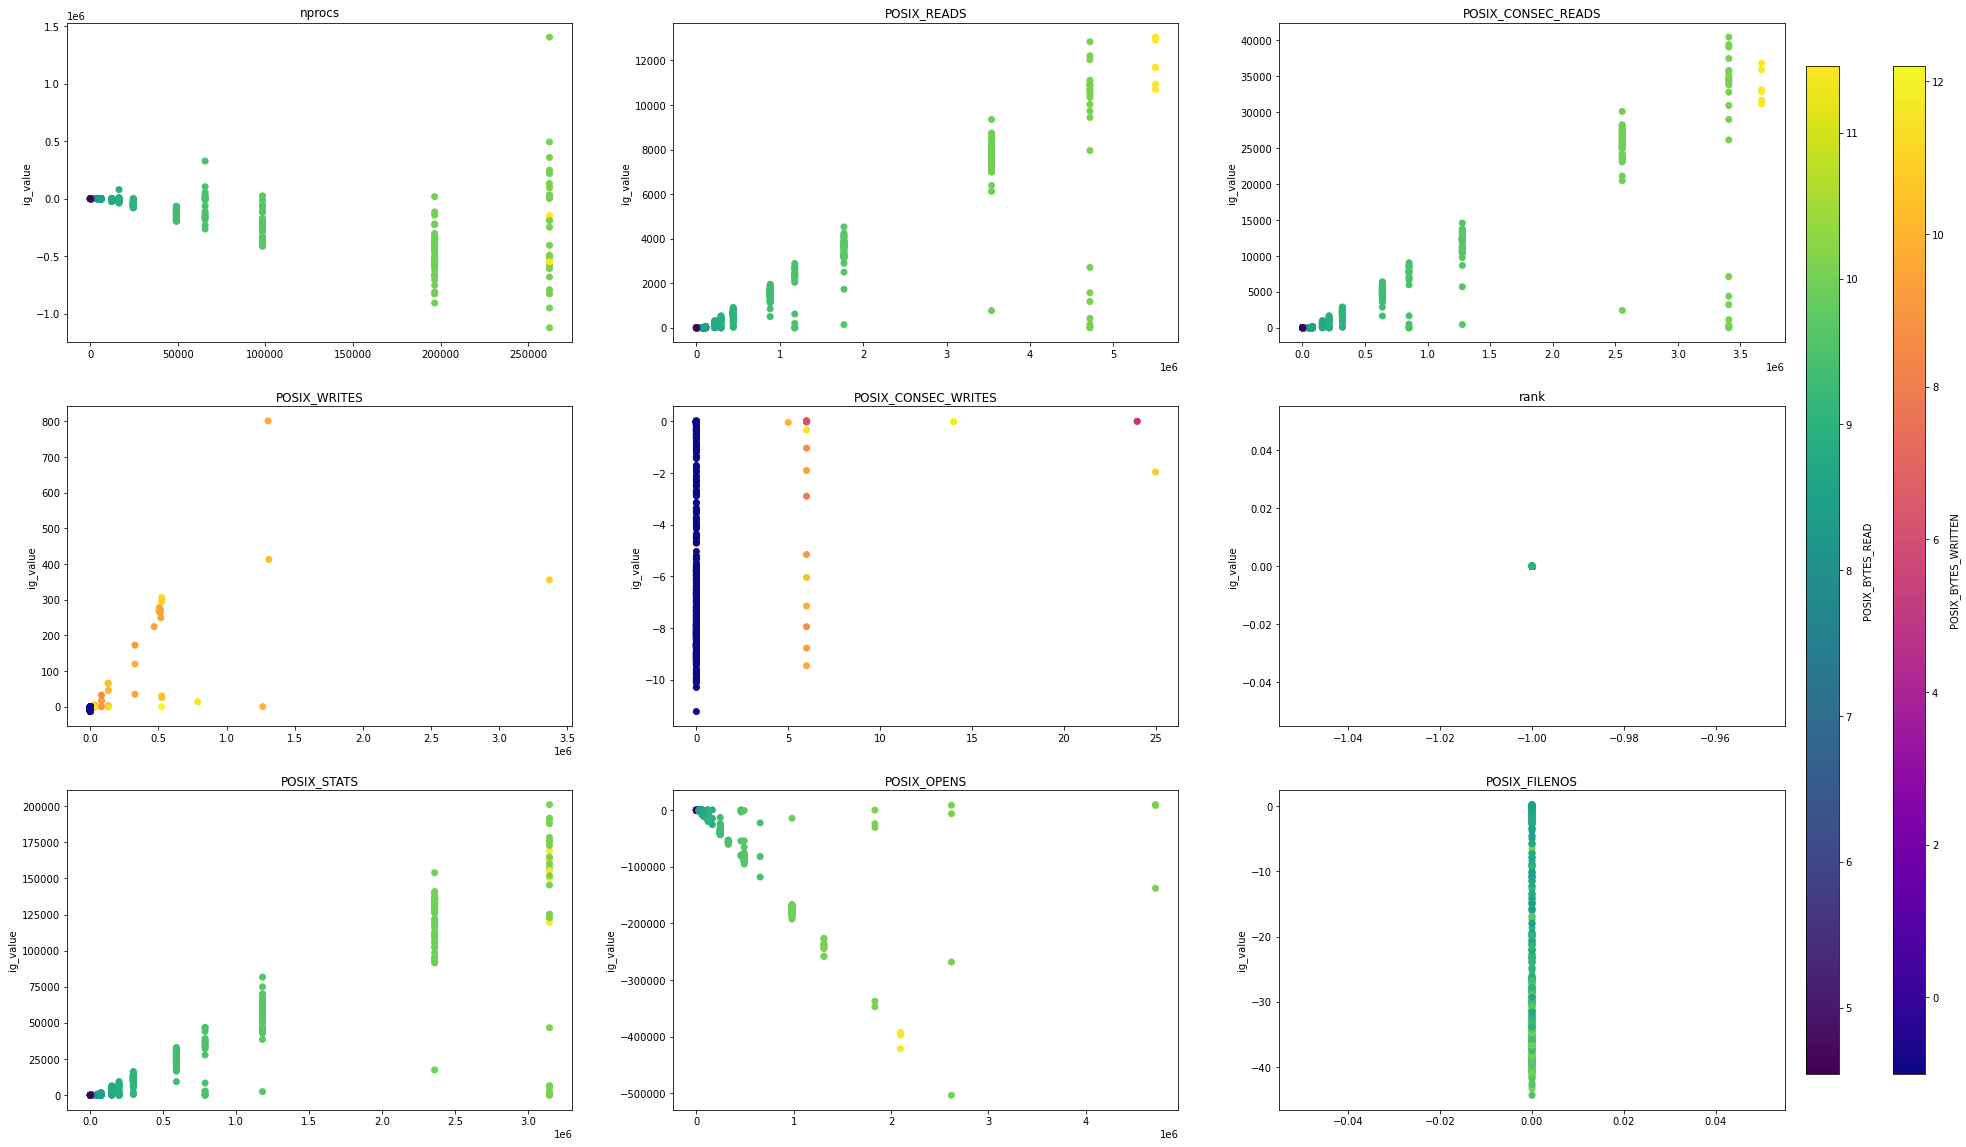

In [14]:
plot_mosaic(df_data["app"].str.contains("rxmd"))

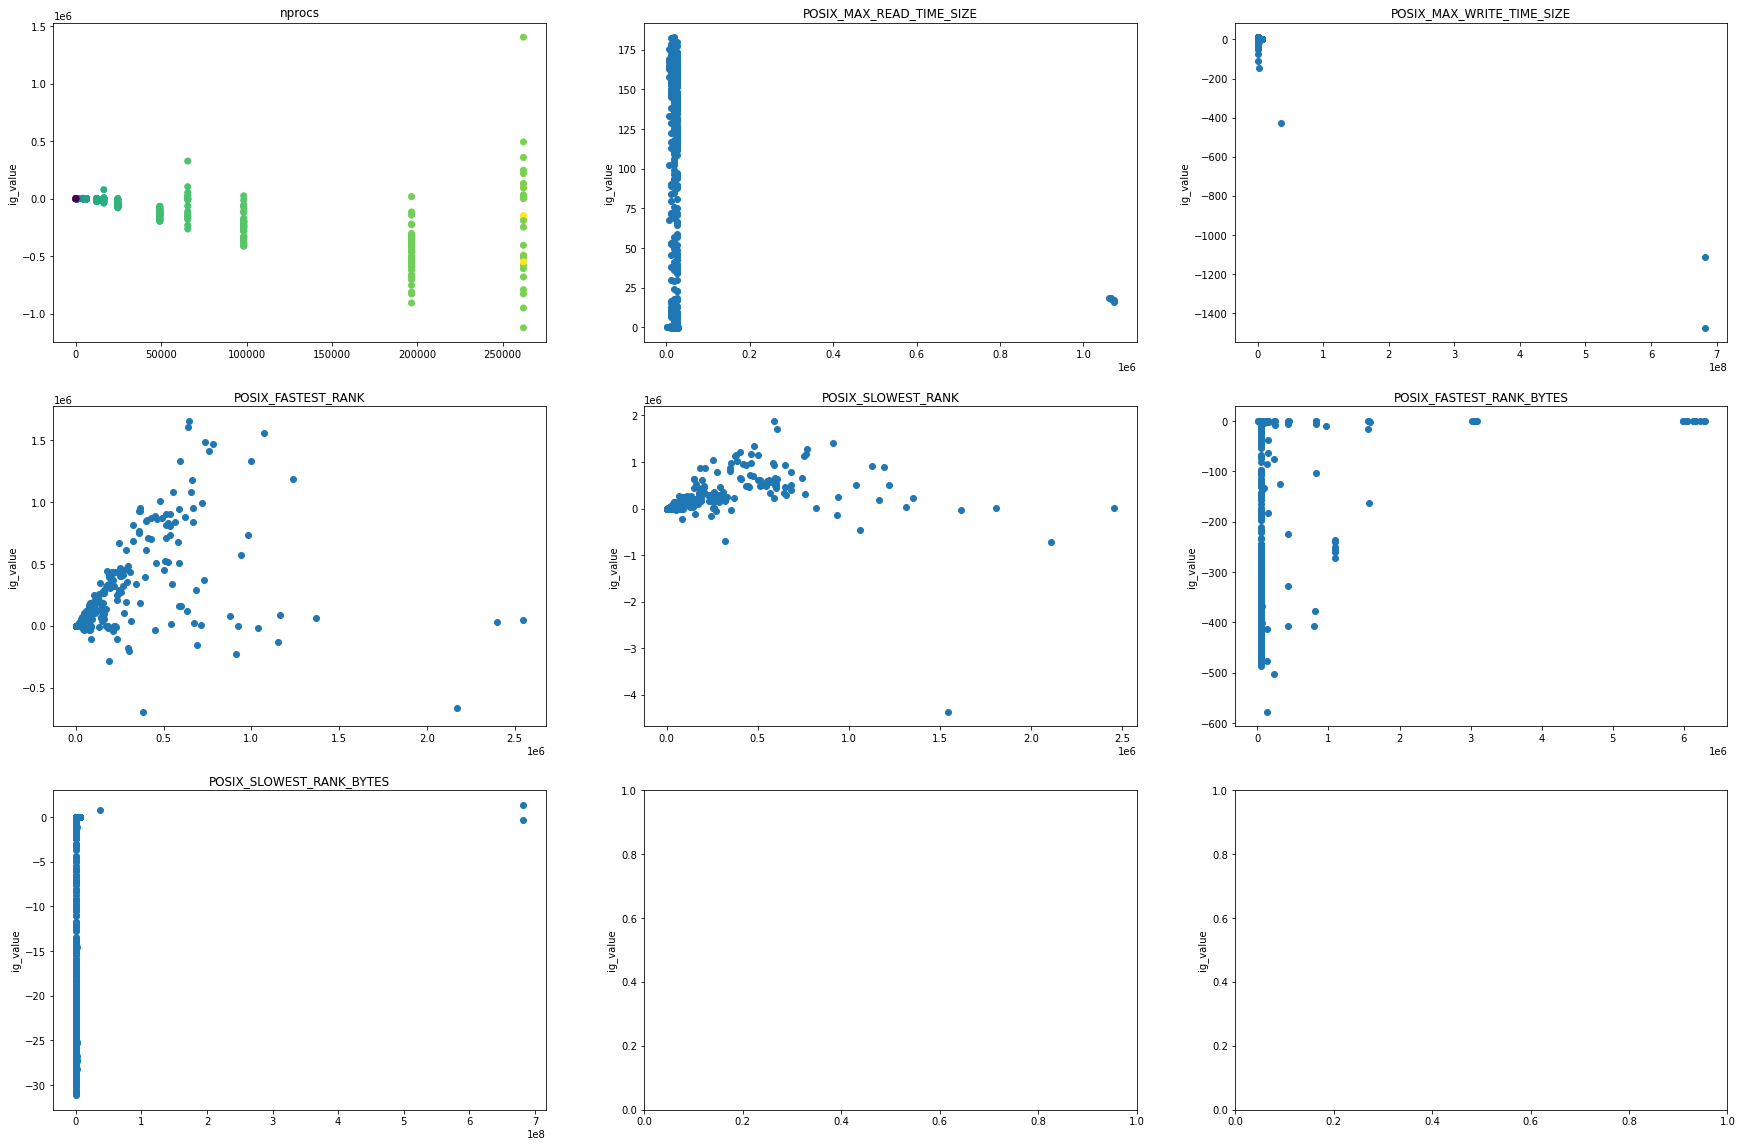

In [17]:
filter_spec = df_data["app"].str.contains("rxmd")#& (df_data["mean"].isna() == False)
fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
[ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
plot_df_w_filter(df,filter_spec,"nprocs",axs[0,0])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_MAX_READ_TIME_SIZE",axs[0,1])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_MAX_WRITE_TIME_SIZE",axs[0,2])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_FASTEST_RANK",axs[1,0])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_SLOWEST_RANK",axs[1,1])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_FASTEST_RANK_BYTES",axs[1,2])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_SLOWEST_RANK_BYTES",axs[2,0])

Duplicate set with highest mean and variance has a surprisingly low error (67.74%)

In [28]:
df[df_data["mean"] == 232360.94867503643].var().sort_values(ascending=False)

POSIX_SLOWEST_RANK           9.146832e+09
nprocs                       3.226030e+09
POSIX_FASTEST_RANK           2.066638e+08
POSIX_STATS                  5.147435e+07
READ_1K_10K                  1.302575e+07
POSIX_SIZE_READ_1K_10K       1.249918e+07
POSIX_MEM_NOT_ALIGNED        8.518606e+06
READ_100_1K                  8.036168e+06
POSIX_SIZE_READ_100_1K       7.680028e+06
Unnamed: 0                   2.654208e+06
POSIX_OPENS                  1.584233e+06
POSIX_ACCESS3_COUNT          1.521878e+06
POSIX_SIZE_READ_0_100        1.481259e+06
POSIX_CONSEC_READS           7.182182e+05
READ_0_100                   6.155363e+05
POSIX_ACCESS2_COUNT          1.515982e+05
POSIX_SEQ_READS              1.020888e+05
POSIX_READS                  5.588204e+04
POSIX_FASTEST_RANK_BYTES     4.989719e+03
POSIX_ACCESS1_COUNT          9.496818e+02
POSIX_SEEKS                  7.894080e+02
POSIX_FILE_NOT_ALIGNED       7.849992e+02
POSIX_BYTES_READ             3.013640e+02
POSIX_MODE                   1.057

In [14]:
df[df_data["app"].str.contains("rxmd")].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,457.0,142417.814004,95271.980302,2.200000e+01,16116.000000,209129.000000,213537.000000,2.180720e+05
POSIX_OPENS,457.0,-48438.243137,80873.647399,-5.035471e+05,-59103.240876,-9307.638096,-0.072909,9.817486e+03
POSIX_FILENOS,457.0,-18.781617,15.784098,-4.432940e+01,-33.815872,-21.464947,-0.277783,2.294419e-01
POSIX_DUPS,457.0,-13.604639,11.431845,-3.397154e+01,-24.412005,-16.122807,-0.197878,3.823093e+00
POSIX_READS,457.0,1940.869065,3095.255412,-2.961388e-01,1.551832,320.742077,2463.724309,1.304373e+04
POSIX_WRITES,457.0,4.553816,59.173630,-1.322647e+01,-9.581631,-5.290642,-0.002588,8.011410e+02
POSIX_SEEKS,457.0,53.490784,128.635881,-1.836240e-01,0.326375,8.632982,48.725309,1.372197e+03
POSIX_STATS,457.0,29831.830475,46693.515826,-7.961292e+01,9.677338,5700.994950,37443.590341,2.010854e+05
POSIX_MMAPS,457.0,0.000000,0.000000,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00
POSIX_FSYNCS,457.0,0.000000,0.000000,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00


In [16]:
df_data[df_data["app"].str.contains("rxmd")].POSIX_STATS.head(10)

22        49152
45      3145733
91          768
165      786434
333       49152
572       49152
608         768
959        3077
1140      49154
1315     196608
Name: POSIX_STATS, dtype: int64

## cp2k

In [15]:
df[df_data["app"].str.contains("cp2k")].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8626.0,16774.547994,13710.300926,0.000000,7719.250000,15214.000000,24196.750000,2.176250e+05
POSIX_OPENS,8626.0,181.781693,149.861721,4.394177,100.153010,111.071916,432.875813,4.378796e+02
POSIX_FILENOS,8626.0,-172.103248,170.061394,-460.608737,-453.877935,-93.975425,-81.762302,1.483134e+03
POSIX_DUPS,8626.0,0.001637,0.001374,0.000096,0.000895,0.000995,0.003932,1.883280e-02
POSIX_READS,8626.0,-0.016414,0.013944,-0.168699,-0.039610,-0.009855,-0.008848,-1.764623e-04
POSIX_WRITES,8626.0,0.113645,0.098150,-0.006703,0.065348,0.072210,0.275473,2.791953e-01
POSIX_SEEKS,8626.0,0.002867,0.002292,-0.007052,0.001573,0.001741,0.006709,7.273204e-03
POSIX_STATS,8626.0,1.061046,0.886981,-0.085033,0.562845,0.627718,2.555101,2.711216e+00
POSIX_MMAPS,8626.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
POSIX_FSYNCS,8626.0,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000e+00


In [ ]:
plot_mosaic(df_data["app"].str.contains("cp2k") & (df_data["mean"].isna() == False))

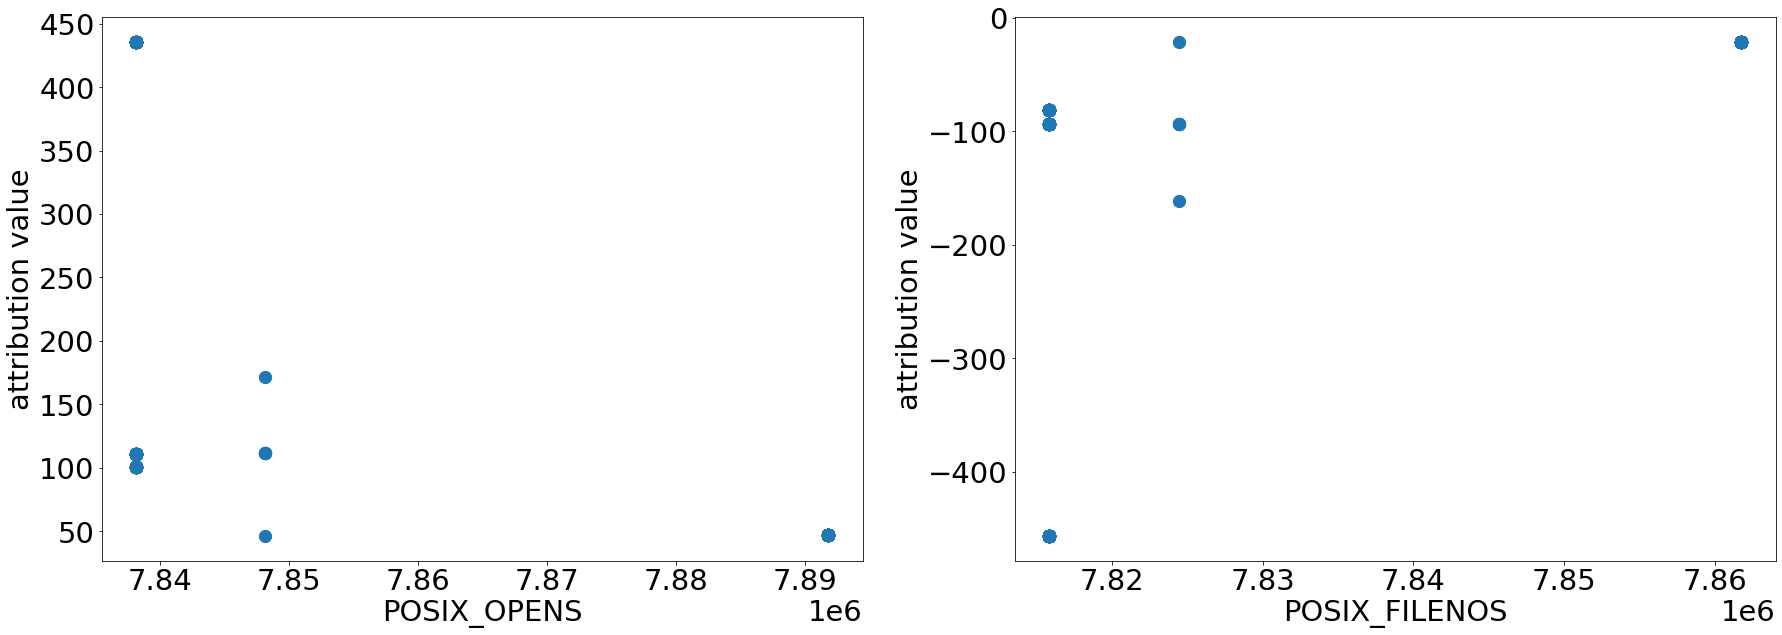

In [21]:
plt.rcParams.update({'font.size': 29})
filter_spec = df_data["app"].str.contains("cp2k") & (df_data["mean"].isna() == False)
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
[ax.set_ylabel("attribution value") for ax in axs]
plot_df_w_filter_no_color(df,filter_spec,"POSIX_OPENS",axs[0],150)
plot_df_w_filter_no_color(df,filter_spec,"POSIX_FILENOS",axs[1],150)
plt.savefig(Path("pictures","theta_captum_plot_no_IQR_cp2k_dups_only").with_suffix(".svg"),format="svg",bbox_inches="tight")

## pw.x (QuantumExpresso)

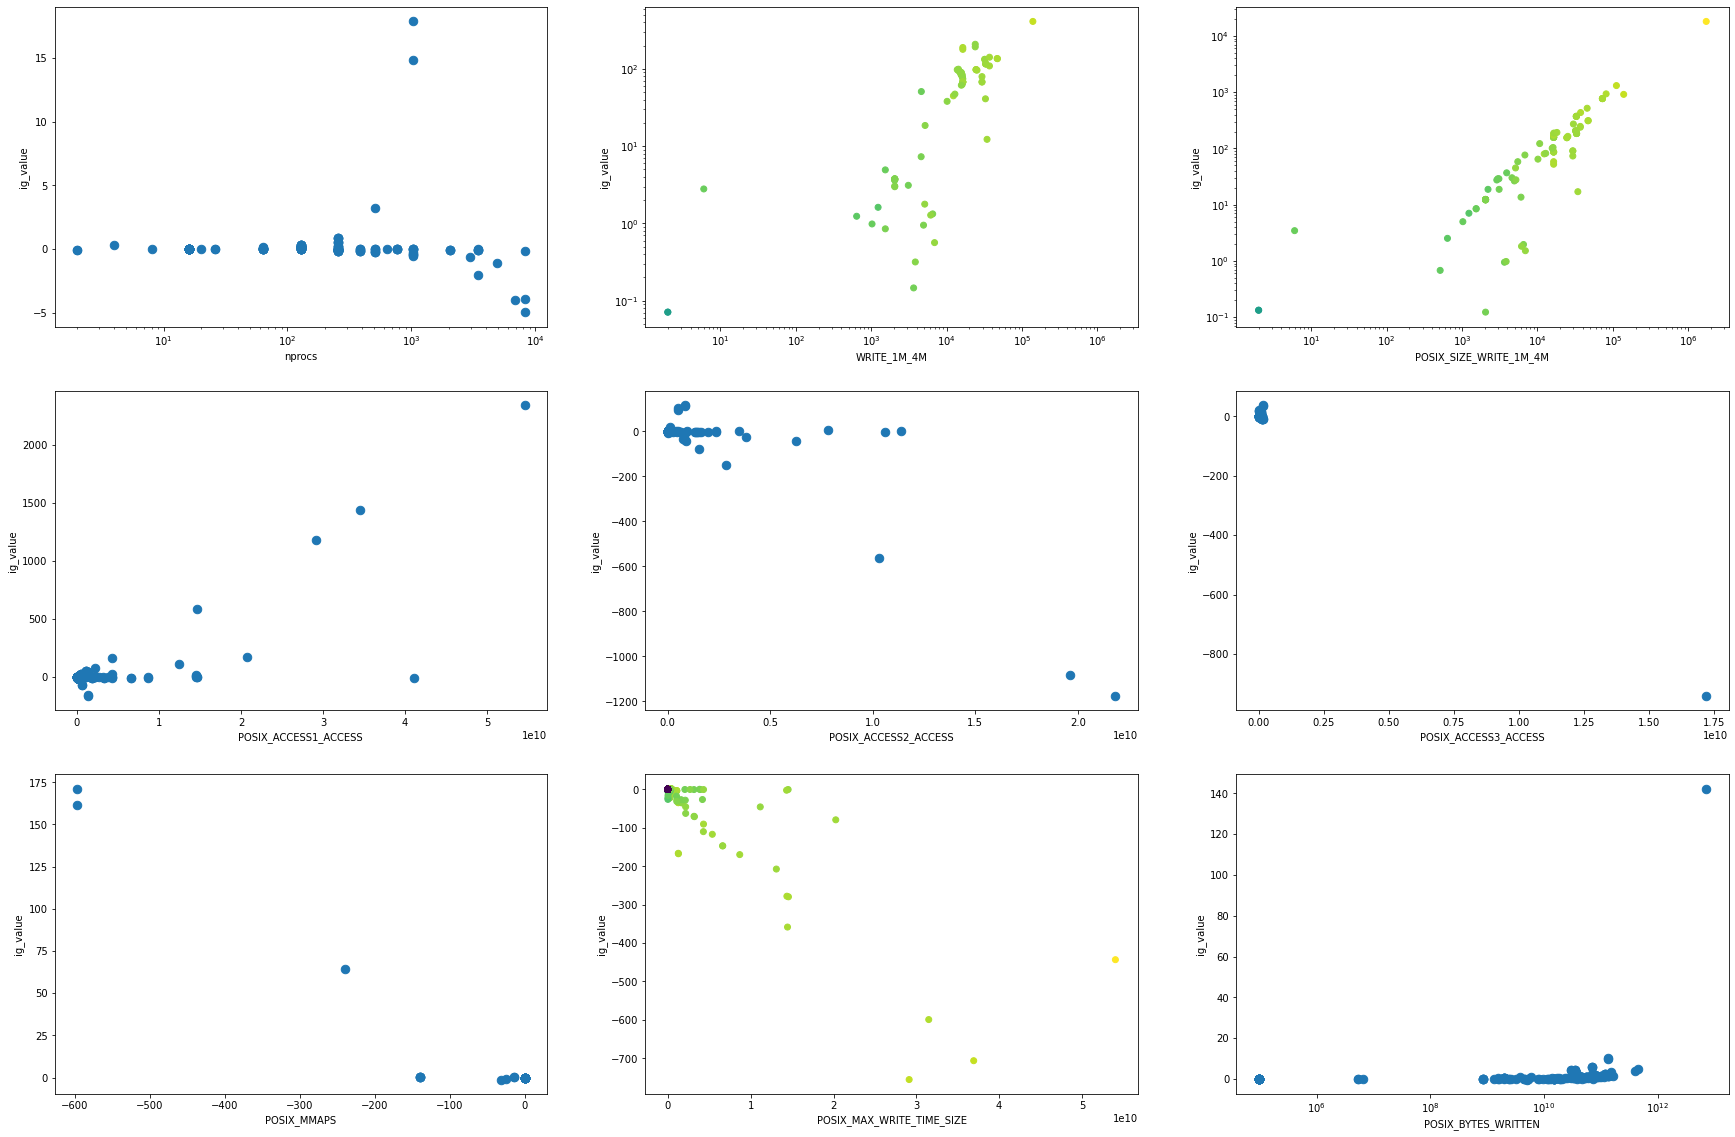

In [9]:
filter_spec = df_data["app"].str.contains("pw.x")
fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
[ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
plot_df_w_filter_no_color(df,filter_spec,"nprocs",axs[0,0])
plot_df_w_filter(df,filter_spec,"WRITE_1M_4M",axs[0,1],bytes_written_copy)
plot_df_w_filter(df,filter_spec,"POSIX_SIZE_WRITE_1M_4M",axs[0,2],bytes_written_copy)
plot_df_w_filter_no_color(df,filter_spec,"POSIX_ACCESS1_ACCESS",axs[1,0])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_ACCESS2_ACCESS",axs[1,1])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_ACCESS3_ACCESS",axs[1,2])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_MMAPS",axs[2,0])
plot_df_w_filter(df,filter_spec,"POSIX_MAX_WRITE_TIME_SIZE",axs[2,1],bytes_written_copy)
plot_df_w_filter_no_color(df,filter_spec,"POSIX_BYTES_WRITTEN",axs[2,2])
axs[0,0].set_xscale("log")
axs[0,1].set_yscale("log")
axs[0,1].set_xscale("log")
axs[0,2].set_yscale("log")
axs[0,2].set_xscale("log")
axs[2,2].set_xscale("log")

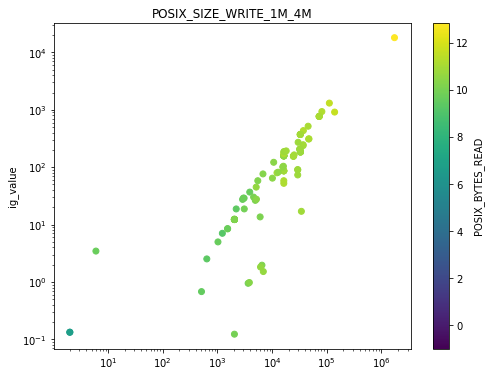

In [16]:
filter_spec = df_data["app"].str.contains("pw.x")
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(8, 6))
axs.set_ylabel("ig_value")
sc_read = plot_df_w_filter(df,filter_spec,"POSIX_SIZE_WRITE_1M_4M",axs,bytes_written_copy)
axs.set_xscale("log")
axs.set_yscale("log")
fig.colorbar(sc_read,label="POSIX_BYTES_READ")

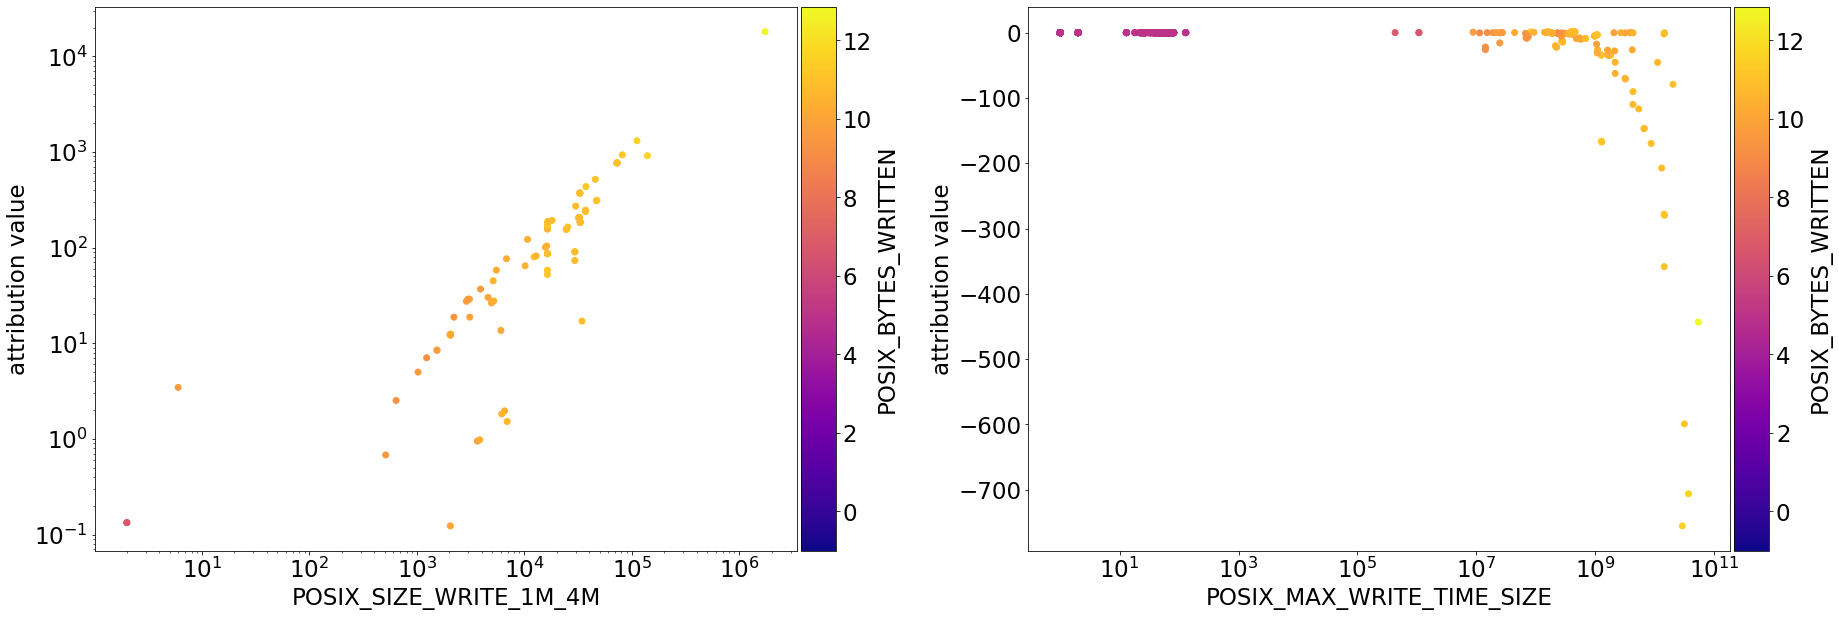

In [39]:
plt.rcParams.update({'font.size': 23})
filter_spec = df_data["app"].str.contains("pw.x")
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
plt.subplots_adjust(wspace=0.26)
[ax.set_ylabel("attribution value") for ax in axs]
plot_df_w_filter(df,filter_spec,"POSIX_SIZE_WRITE_1M_4M",axs[0],bytes_written_copy,"plasma")
plot_df_w_filter(df,filter_spec,"POSIX_MAX_WRITE_TIME_SIZE",axs[1],bytes_written_copy,"plasma")
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[1].set_xscale("log")
plt.savefig(Path("pictures","captum_plot_no_IQR_theta_pwx_small_horizontal").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

In [41]:
df_data[filter_spec]["POSIX_MMAPS"].unique()

array([   0, -140,  -14,  -32,  -25, -597, -239])

In [12]:
df[df_data["app"].str.contains("pw.x")].describe().transpose().sort_values(by=["max"],ascending=False)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,46972.0,135724.570553,69480.769632,1.000000,107349.250000,141759.000000,194759.250000,218110.000000
POSIX_SIZE_WRITE_1M_4M,46972.0,0.707676,84.599279,-152.608243,0.000000,0.000000,0.000000,18113.975489
POSIX_ACCESS1_ACCESS,46972.0,0.142815,14.201368,-163.552907,0.019628,0.020461,0.020551,2345.226074
WRITE_1M_4M,46972.0,-0.024783,17.530990,-3634.553569,0.000000,0.000000,0.000000,412.535604
POSIX_MMAPS,46972.0,0.008453,1.125429,-1.201750,0.000000,0.000000,0.000000,171.109115
POSIX_BYTES_WRITTEN,46972.0,-0.063342,0.668723,-0.297632,-0.070465,-0.070186,-0.070114,142.156282
POSIX_ACCESS2_ACCESS,46972.0,-0.063891,7.930707,-1175.287214,-0.004421,-0.004416,-0.003920,117.091639
POSIX_MODE,46972.0,-0.002127,0.243710,-10.424824,-0.002348,-0.002329,-0.002213,40.591567
POSIX_ACCESS3_ACCESS,46972.0,-0.017976,4.361798,-940.474321,-0.005478,-0.005469,-0.004715,37.311468
POSIX_SIZE_READ_1M_4M,46972.0,0.009841,0.491328,-7.119125,0.000000,0.000000,0.000000,26.910775
